In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import math

# 1a Logistic "2" Detector

Load data

In [18]:
DATA_FNAME = 'mnist_traindata.hdf5'
DATA2_FNAME = 'mnist_testdata.hdf5'
train_data = h5py.File(DATA_FNAME, 'r+')
test_data = h5py.File(DATA2_FNAME, 'r+')

In [19]:
x_train_data = train_data['xdata'][:] #60_000x784
y_train_data = train_data['ydata'][:] #60_000X10

x_test_data = test_data['xdata'][:] #60_000x784
y_test_data = test_data['ydata'][:] #60_000X10

DETECT_CLASS = 2

target = (y_train_data.argmax(axis = 1) == DETECT_CLASS)
target = 1*target # 6000x1

In [4]:
# Initialize Weights to a 784x1 nparray
weights = np.random.normal(0, .05, size=784)
# bias
bias = np.random.normal(0, .05, size=1)

### Functions: Prob, Bin_Cross, Regressor

In [5]:
# Estimate a probability that an input vector x is "2"
"""
For training set, returns a 60000x1 vector with a probability for each input
For testing, returns 10000x1 vector
"""
def prob(x, w, w_0):
    probabilities = np.empty((x.shape[0], 1))
    
    probabilities = 1 / (1 + np.exp(-(np.dot(x, w) + w_0)))
    
    return probabilities

In [6]:
"""
Should return one loss value
For training: 60_000x1
Loss vector should be same size as weight
"""
def bin_cross_loss(x, w, w_0, target):
    
    #target.reshape((len(x), 1))
    p_x = prob(x, w, w_0)
    
    # calculate each element individually and then sum
    #a = target * np.log(p_x)
    #b = (1 - target) * np.log(1 - p_x)
    #c = np.sum(a + b)
    #loss = -(c/len(x))
    
    epsilon = 1e-15  # Small epsilon value to avoid log(0)

    # Calculate the binary cross-entropy loss
    loss = -(np.sum(target * np.log(p_x + epsilon) + (1 - target) * np.log(1 - p_x + epsilon))) / len(x)
    
    # loss = -(np.sum(target * np.log(p_x) + (1 - target) * np.log(1-p_x)))/len(x)
    
    return loss

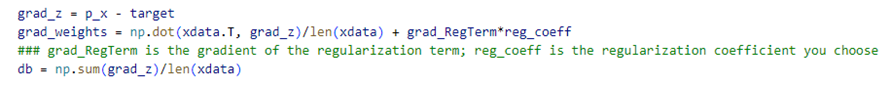

In [7]:
def regressor(w, w_0, x, target, reg_type, reg_coeff, learning_rate):
    p_x = prob(x, w, w_0)
    log_loss = bin_cross_loss(x, w, w_0, target)
    
    gradients_dict = {}
    grad_z = p_x - target
    
    
    if reg_type == 'l1':
        gradients_dict['grad_weights'] = np.dot(x.transpose(), grad_z)/len(x) + (np.sum(abs(w)))*reg_coeff # pick coeff
    
    else: # if using l2
        gradients_dict['grad_weights'] = np.dot(x.transpose(), grad_z)/len(x) + (np.linalg.norm(w)**2)*reg_coeff
        # x is 60000x784
        # x.transpose is 784x60000
        # grad_z is 60000x1
        #
    
    #gradients_dict['grad_bias'] = np.sum(grad_z)/len(x)
    gradients_dict['grad_bias'] = -(np.sum((p_x)*(1-p_x)*(1)))/len(x)
    
    new_weights = w - learning_rate * gradients_dict['grad_weights']
    
    new_bias = w_0 - learning_rate * gradients_dict['grad_bias']
    
    return [p_x, log_loss, new_weights, new_bias]

### Testing

In [8]:
p2, loss2, weights2, bias2 = regressor(weights, bias, x_train_data, target, 'l2', .03, .01)
print(loss2)

0.757047870896141


In [9]:
p3, loss3, weights3, bias3 = regressor(weights2, bias2, x_train_data, target, 'l2', .03, .01)
print(loss3)


0.6755133887263073


In [10]:
p4, loss4, weights4, bias4 = regressor(weights3, bias3, x_train_data, target, 'l2', .01, .01)
print(p4.shape)
print(loss4)
print(weights4.shape)
print(bias4)

(60000,)
0.6110450314398652
(784,)
[-0.06778607]


In [11]:
p5, loss5, weights5, bias5 = regressor(weights4, bias4, x_train_data, target, 'l2', .01, .01)
print(loss5)

0.5709760547676211


In [ ]:
# rewrite iteratively
def recursive_regressor(w, w_0, x, target, reg_type, reg_coeff, learning_rate, iters):
    if iters == 0:
        return 
    
    p, loss, weights, bias = regressor(w, w_0, x, target, reg_type, reg_coeff, learning_rate)
    
    return recursive_regressor(weights, bias, x, target, reg_type, reg_coeff, learning_rate, iters-1)

### 3b Softmax Classification: Gradient Descent

In [ ]:
# Initialize Weights to a 784x1 nparray
weights = np.random.normal(0, .05, size=784)
# bias
bias = np.random.normal(0, .05, size=1)
# revert target
target = y_test_data
#target = y_train_data

In [ ]:
# probability function
def prob_softmax(x, weights):
    numerator = exp()